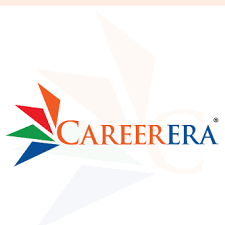

# <span style="color:blue"> ASSIGNMENT QUESTIONS (Ensemble Learning)</span>

#### Question 1: predict turbine energy yield (TEY) with ambient variables as features using Random Forest Regressor.
Link to download data: https://drive.google.com/file/d/1dbzv01StVVk0g1HLIHsmJ0IEBVChdKoy/view?usp=sharing

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

- Variable (Abbr.) Unit Min Max Mean
- Ambient temperature (AT) C â€“6.23 37.10 17.71
- Ambient pressure (AP) mbar 985.85 1036.56 1013.07
- Ambient humidity (AH) (%) 24.08 100.20 77.87
- Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
- Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
- Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
- Turbine after temperature (TAT) C 511.04 550.61 546.16
- Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
- Turbine energy yield (TEY) MWH 100.02 179.50 133.51
- Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
- Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [3]:
#write your code here............
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Loading some example data
df=pd.read_csv('gas_turbines.csv')
df.sample(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
12794,28.1760,1013.5,59.647,4.0944,25.924,1093.5,549.67,133.79,12.234,0.18162,61.185
490,7.1127,1002.7,86.013,5.8328,34.339,1099.8,526.46,165.26,14.140,0.54695,70.941
10556,24.4780,1017.0,66.887,4.4326,30.912,1099.9,535.78,152.33,13.637,1.03020,53.628
9033,5.3341,1024.0,88.143,4.1669,23.791,1085.6,550.08,134.66,11.896,0.72808,60.380
6708,16.3570,1017.7,93.184,2.2379,19.074,1053.2,548.94,109.32,10.445,4.43180,62.756
9804,10.6270,1008.9,97.408,4.4823,31.198,1100.2,531.86,160.17,13.800,0.88581,65.260
12739,23.9650,1014.0,84.465,3.1930,20.158,1059.7,549.70,111.04,10.657,2.14900,49.614
11122,19.9400,1012.6,96.062,3.1552,19.682,1058.3,550.03,111.78,10.471,2.11150,56.649
13210,29.9400,1011.8,55.764,4.3425,27.357,1099.9,549.34,137.81,12.648,0.81925,65.081
12468,29.1630,1006.6,47.070,4.0714,25.819,1091.7,550.20,132.75,12.311,3.33300,76.131


In [5]:
# Exploration Data Analysis
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [6]:
df.shape

numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

C:\Users\ayoba\AppData\Local\Temp\ipykernel_22028\1504653100.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

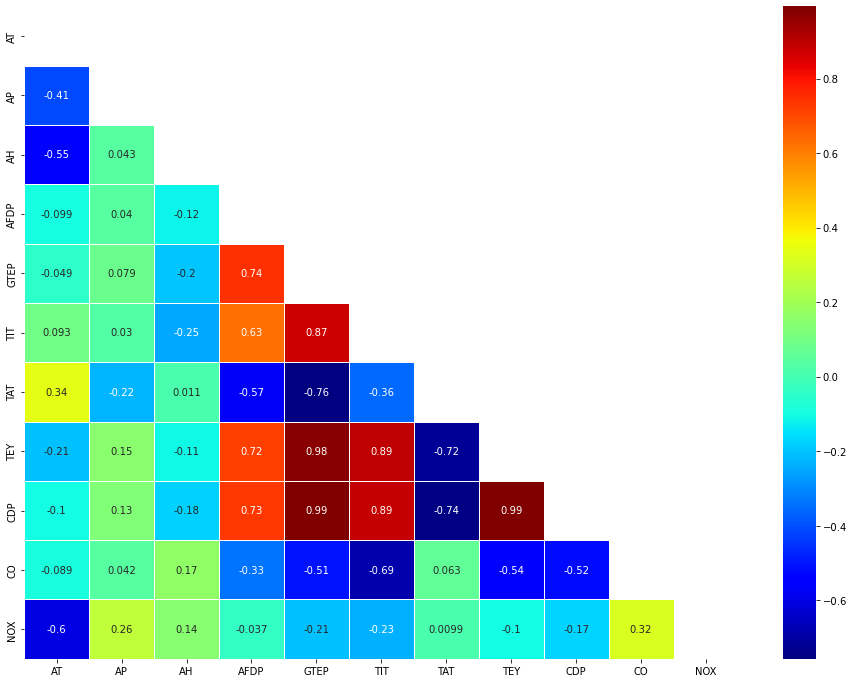

In [7]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [8]:
#from sklearn.preprocessing import StandardScaler
#stdscalar= StandardScaler()
#scale_columns = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
#df[numerical_features]= stdscalar.fit_transform(df[numerical_features])

In [20]:
X=df.drop('TEY',axis=1)
Y=df[df.columns[7:8]]
numerical_features_X = X.describe(include=["int64","float64"]).columns
numerical_features_X

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
#scale_columns = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
X_Scalar= stdscalar.fit_transform(X)
X_Scalar

array([[-1.35733078,  0.58524028],
       [-1.36367619,  0.58524028],
       [-1.36095673,  0.56871459],
       ...,
       [-1.46792219, -1.02664984],
       [-1.42259784, -0.52833681],
       [-1.37727349,  0.05768949]])

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, Y, test_size=0.3, random_state=0) # 70% training and 30% test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527, 1), (4512, 1))

In [13]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
y_pred

C:\Users\ayoba\AppData\Local\Temp\ipykernel_22028\3376389169.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


array([133.8811, 156.4188, 133.9043, ..., 133.7928, 153.9534, 133.734 ])

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("=== R2_Score ===")
print('R2 Score: %.2f' % r2_score(y_test,y_pred))
print('\n')
print("=== Mean Absolute Error ===")
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))
print('\n')

=== R2_Score ===
R2 Score: 1.00


=== Mean Absolute Error ===
Mean absolute error: 0.42




Generating the Model on Selected Features

In [21]:
feature_imp = pd.Series(regressor.feature_importances_,index=numerical_features_X).sort_values(ascending=False)
feature_imp

CDP     0.962098
TAT     0.023209
AT      0.006327
TIT     0.004112
GTEP    0.002612
NOX     0.000432
CO      0.000345
AFDP    0.000302
AP      0.000293
AH      0.000272
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


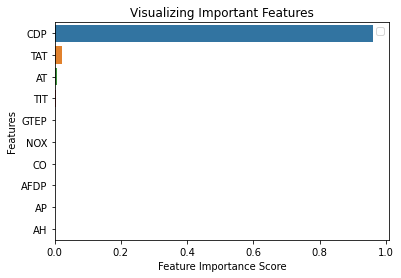

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [23]:
# Split dataset into features and labels
X=df[['CDP', 'TAT']]  # Removed feature "sepal width"
y=df['TEY']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0) # 70% training and 30% test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 2), (4512, 2), (10527,), (4512,))

In [27]:
clf = RandomForestRegressor(n_estimators = 100, random_state = 0)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred1=clf.predict(X_test)
y_pred1


array([133.266  , 157.7439 , 134.33555, ..., 133.4264 , 150.5728 ,
       134.2786 ])

In [28]:
print("=== R2_Score ===")
print('R2 Score: %.2f' % r2_score(y_test,y_pred1))
print('\n')
print("=== Mean Absolute Error ===")
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred1))


=== R2_Score ===
R2 Score: 0.99


=== Mean Absolute Error ===
Mean absolute error: 1.16


#### Question 2: Predict whether the client has subscribed a term deposit or not

Link to download data:https://drive.google.com/file/d/1d_-aOSnkw7feb9FN6SiPbbpq__5Q58UR/view?usp=sharing

In [ ]:
#write your code here............

In [30]:
# Loading some example data
Client_df=pd.read_csv('bank-full.csv',sep=";")
Client_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29003,50,services,married,secondary,no,545,no,no,cellular,2,feb,72,1,-1,0,unknown,no
21534,59,retired,married,unknown,no,613,no,no,cellular,19,aug,75,2,-1,0,unknown,no
32109,51,entrepreneur,married,primary,no,726,yes,yes,cellular,15,apr,87,2,-1,0,unknown,no
6932,45,services,married,secondary,no,-36,yes,yes,unknown,28,may,389,4,-1,0,unknown,no
44620,69,technician,married,secondary,no,2661,no,no,cellular,1,sep,925,1,187,3,other,no
44711,53,admin.,married,secondary,no,0,no,no,telephone,6,sep,353,1,655,5,failure,no
11992,46,management,married,tertiary,no,5464,no,no,unknown,20,jun,79,4,-1,0,unknown,no
25069,55,management,divorced,tertiary,no,0,no,no,cellular,18,nov,120,2,-1,0,unknown,no
1662,49,services,divorced,secondary,no,470,yes,no,unknown,9,may,659,2,-1,0,unknown,no
11149,46,management,single,tertiary,no,46,no,yes,unknown,18,jun,107,1,-1,0,unknown,no


In [37]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "Target":    {"no": 0, "yes": 1} 
                    }

Client_df=Client_df.replace(replaceStruct)
Client_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,OUTPUT_LABEL
0,58,2,2,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,no,0
1,44,3,1,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,no,0
2,33,8,2,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,no,0


In [39]:
Client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  int64 
 2   marital       45211 non-null  int64 
 3   education     45211 non-null  int64 
 4   default       45211 non-null  int64 
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  int64 
 7   loan          45211 non-null  int64 
 8   contact       45211 non-null  int64 
 9   day           45211 non-null  int64 
 10  month         45211 non-null  int64 
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  int64 
 16  y             45211 non-null  object
 17  OUTPUT_LABEL  45211 non-null  int32 
dtypes: int32(1), int64(16), object(1)
memory usage

In [50]:
X=Client_df.drop(['y','OUTPUT_LABEL'],axis=1)
Y=Client_df['OUTPUT_LABEL']

In [61]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=0) # 70% training and 30% test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31647, 16), (13564, 16), (31647,), (13564,))

In [66]:
# Using Random Forest Classifier
clf=RandomForestClassifier(n_estimators=6)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [70]:
# Model Accuracy, how often is the classifier correct for Random Forest Classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 89.42789737540548


=== Confusion Matrix ===
[[11607   362]
 [ 1072   523]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.59      0.33      0.42      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564





In [71]:
# Using ExtraTrees Classifier
from sklearn.neighbors import KNeighborsClassifier
et =ExtraTreesClassifier(n_estimators=100) 
bmc = BaggingClassifier(KNeighborsClassifier())
et.fit(X_train,y_train)
y_pred2=et.predict(X_test)
y_pred2

array([0, 1, 0, ..., 0, 0, 0])

In [72]:
# Model Accuracy, how often is the classifier correct for Random Forest Classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 90.1061633736361


=== Confusion Matrix ===
[[11607   362]
 [ 1072   523]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.59      0.33      0.42      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564





In [73]:
# Using Bagging Classifier
bmc.fit(X_train,y_train)
y_pred3=bmc.predict(X_test)
y_pred3

array([0, 1, 0, ..., 0, 0, 0])

In [74]:
# Model Accuracy, how often is the classifier correct for Random Forest Classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3)*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 87.70274255381894


=== Confusion Matrix ===
[[11607   362]
 [ 1072   523]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.59      0.33      0.42      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564





#### Question 3: PREDICT THE BURNED AREA OF FOREST FIRES WITH BAGGING AND BOOSTING TECHNIQUES.

Link to download data: https://drive.google.com/file/d/1UddDnSaPsATBCeH1O6afK3awh043U7Ek/view?usp=sharing

In [102]:
#write your code here............
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

In [103]:
forest_df=pd.read_csv('forestfires.csv')
forest_df.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
82,aug,tue,94.8,108.3,647.1,17.0,18.6,51,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
51,aug,sun,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
72,mar,fri,91.7,33.3,77.5,9.0,15.6,25,6.3,0.0,...,0,0,0,0,1,0,0,0,0,small
483,aug,sun,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
397,aug,sun,91.6,181.3,613.0,7.6,24.3,33,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
142,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,...,0,0,0,0,0,0,0,0,0,small
188,mar,sat,90.8,41.9,89.4,7.9,13.3,42,0.9,0.0,...,0,0,0,0,1,0,0,0,0,large
360,sep,fri,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small
410,feb,fri,84.1,7.3,52.8,2.7,14.7,42,2.7,0.0,...,1,0,0,0,0,0,0,0,0,small
314,sep,wed,92.6,115.4,777.1,8.8,19.7,41,1.8,0.0,...,0,0,0,0,0,0,0,0,1,small


In [104]:
replaceStruct = {
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "day":  {"sat":1, "sun": 2, "mon": 3, "tue": 4,"wed": 5,"thu": 6,"fri": 7},
                "size_category":    {"small": 0, "large": 1} 
                    }

forest_df=forest_df.replace(replaceStruct)
forest_df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0


In [105]:
features_X = forest_df.drop(['size_category'], axis = 1)
labels_Y = forest_df['size_category'].values.reshape(-1, 1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(features_X,labels_Y, test_size = 0.2, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((413, 30), (104, 30), (413, 1), (104, 1))

In [107]:
# Create instances of all four classifier
rfc=RandomForestClassifier(n_estimators=100)
et =ExtraTreesClassifier(n_estimators=100) 
bmc = BaggingClassifier(KNeighborsClassifier()) 
abc = AdaBoostClassifier(n_estimators=100,learning_rate=.05)
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=.05,max_depth=1)

In [108]:
from sklearn import metrics
#Train the model using the training sets y_pred=clf.predict(X_test), prediction on test set
for clf in (rfc, et, bmc, abc, gbc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred)*100)

C:\Users\ayoba\AppData\Local\Temp\ipykernel_22028\1289651690.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\ayoba\AppData\Local\Temp\ipykernel_22028\1289651690.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\ayoba\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestClassifier 99.03846153846155
ExtraTreesClassifier 88.46153846153845
BaggingClassifier 84.61538461538461
AdaBoostClassifier 100.0
GradientBoostingClassifier 100.0


C:\Users\ayoba\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayoba\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generating the Model on Selected Features

In [109]:
numerical_features = features_X.describe(include=["int64","float64"]).columns
numerical_features
feature_imp_F = pd.Series(clf.feature_importances_,index=numerical_features).sort_values(ascending=False)
feature_imp_F

area        1.0
month       0.0
daytue      0.0
monthoct    0.0
monthnov    0.0
monthmay    0.0
monthmar    0.0
monthjun    0.0
monthjul    0.0
monthjan    0.0
monthfeb    0.0
monthdec    0.0
monthaug    0.0
monthapr    0.0
daywed      0.0
daythu      0.0
day         0.0
daysun      0.0
daysat      0.0
daymon      0.0
dayfri      0.0
rain        0.0
wind        0.0
RH          0.0
temp        0.0
ISI         0.0
DC          0.0
DMC         0.0
FFMC        0.0
monthsep    0.0
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


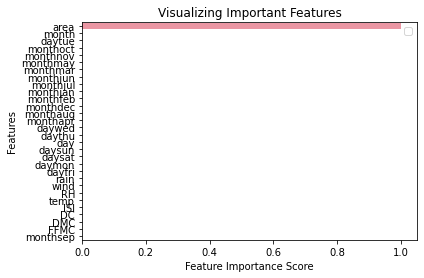

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_F, y=feature_imp_F.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [111]:
# Split dataset into features and labels
X=forest_df[['area']]  # Removed feature "sepal width"
y=forest_df['size_category'].values.reshape(-1, 1)                                      
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0) # 70% training and 30% test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((361, 1), (156, 1), (361, 1), (156, 1))

In [112]:
#Train the model using the training sets y_pred=clf.predict(X_test), prediction on test set
for clf1 in (rfc, et, bmc, abc, gbc):
    clf1.fit(X_train, y_train)
    y_pred1 = clf1.predict(X_test)
    print(clf1.__class__.__name__, accuracy_score(y_test,y_pred1)*100)

RandomForestClassifier 99.35897435897436
ExtraTreesClassifier 99.35897435897436
BaggingClassifier 100.0
AdaBoostClassifier 99.35897435897436
GradientBoostingClassifier 99.35897435897436


C:\Users\ayoba\AppData\Local\Temp\ipykernel_22028\1744666860.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_train, y_train)
C:\Users\ayoba\AppData\Local\Temp\ipykernel_22028\1744666860.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_train, y_train)
C:\Users\ayoba\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayoba\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().